In [2]:
##########################################################################
# Created on Sat Nov 06 17:32:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

# 7.5.3.Measure probability of default using bond price

Suppose a zero coupon risky bond with T years time to maturity.\
$$P^*=Me^{-y^*T}$$\
where,\
M:par of bond\
$y^*$:YTM(continuous compound)

Applying the principle of risk neutrality,\
$$P^*=Me^{-yT}e^{-\lambda T}+RMe^{-yT}(1-e^{-\lambda T})$$\
where,\
y:risk free rate\
$\lambda$:Annualized probability of default（continuous compound）\
$e^{-\lambda T}$:probability of no default in T years\
$1-e^{-\lambda T}$:probability of default in T years\
R:recovery rate in case of default

Use above 2 equations,\
$$\lambda=-\frac{1}{T}ln(\frac{e^{-y^*T}-Re^{-yT}}{1-R})-y$$

In [5]:
import numpy as np
def default_prob(y1,y2,R,T):
    '''Define a function for calculating probability of default(continuous compound) using YTM
    y1:risk free rate(continuous compound)
    y2:YTM of risky bond(continuous compound)
    R:recovery rate
    T:time to maturity(in year)'''
    A=(np.exp(-y2*T)-R*np.exp(-y1*T))/(1-R)
    prob=-np.log(A)/T-y1
    return prob

Bond           | Issuer | Term/Year | Rating | YTM(c) |Recovery | Risk free 
:---:          | :----: | :----:    | :----: | :----: | :----:  | :----: 
16 Pension debt| Yizhang| 3         | AA     | 7.3611%| 38.1%   | 2.922%
14 Construction| Hebei  | 5         | AAA    | 4.2471%| 69.9%   | 2.9811%

In [6]:
T_yz=3
T_jj=5
y_yz=0.073611
y_jj=0.042471
R_yz=0.381
R_jj=0.696
rate_3y=0.02922
rate_5y=0.029811

default_yz=default_prob(y1=rate_3y,y2=y_yz,R=R_yz,T=T_yz)
default_jj=default_prob(y1=rate_5y,y2=y_jj,R=R_jj,T=T_jj)

print('Probability of default rate(continuous compound) of 16 Pension debt is ',round(default_yz,4))
print('Probability of default rate(continuous compound) of 14 Construction is ',round(default_jj,4))

Probability of default rate(continuous compound) of 16 Pension debt is  0.075
Probability of default rate(continuous compound) of 14 Construction is  0.0451


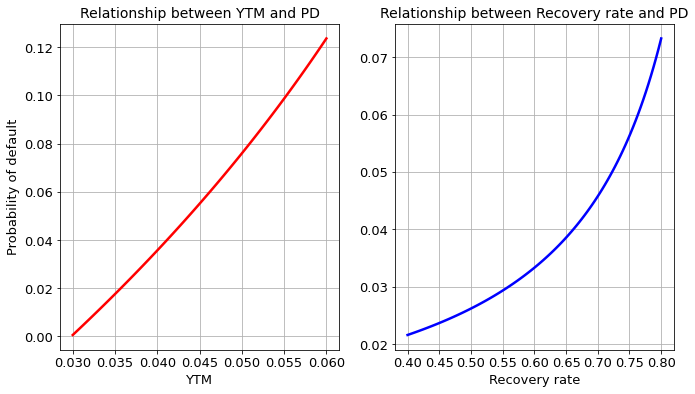

In [7]:
y_jj_list=np.linspace(0.03,0.06,100)
default_jj_list1=default_prob(y1=rate_5y,y2=y_jj_list,R=R_jj,T=T_jj)

R_jj_list=np.linspace(0.4,0.8,100)
default_jj_list2=default_prob(y1=rate_5y,y2=y_jj,R=R_jj_list,T=T_jj)

import matplotlib.pyplot as plt

plt.figure(figsize=(11,6))
plt.subplot(1,2,1)
plt.plot(y_jj_list,default_jj_list1,'r-',lw=2.5)
plt.xlabel('YTM',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Probability of default',fontsize=13,rotation=90)
plt.yticks(fontsize=13)
plt.title('Relationship between YTM and PD',fontsize=14)
plt.grid()

plt.subplot(1,2,2)
plt.plot(R_jj_list,default_jj_list2,'b-',lw=2.5)
plt.xlabel('Recovery rate',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Relationship between Recovery rate and PD',fontsize=14)
plt.grid()
plt.show()